Mean Absolute Error (10 trials)
--------------------------------------------------
Samples =    10 | vs 4*atan(1): 0.600000 | vs numpy.pi: 0.600000
Samples =   100 | vs 4*atan(1): 0.139363 | vs numpy.pi: 0.139363
Samples =  1000 | vs 4*atan(1): 0.038400 | vs numpy.pi: 0.038400
Samples = 10000 | vs 4*atan(1): 0.008724 | vs numpy.pi: 0.008724


<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

<Figure size 576x360 with 0 Axes>

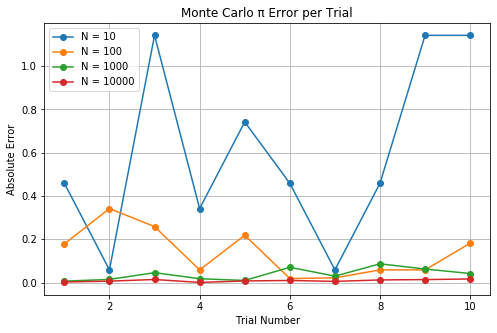

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

#Values
pi_numpy = np.pi
pi_calc = 4 * np.arctan(1)

# Monte Carlo Approximation
def approximate_pi(samples):
    count = 0
    for _ in range(samples):
        x = r.uniform(-1, 1)
        y = r.uniform(-1, 1)
        if x**2 + y**2 <= 1: count += 1
    return 4 * count / samples   

# Runs and trials
num_trials = 10
sample_sizes = [10, 100, 1000, 10000]

errors_calc = {}    
errors_numpy = {}

for s in sample_sizes:
    errors_calc[s] = []
    errors_numpy[s] = []
    
    for j in range(num_trials):
        pi_mc = approximate_pi(s)
        errors_calc[s].append(abs(pi_mc - pi_calc))
        errors_numpy[s].append(abs(pi_mc - pi_numpy))

#Display
print("Mean Absolute Error (10 trials)")
print("-" * 50)

#Display of Samples and their errors respectively
for s in sample_sizes:
    print(
        f"Samples = {s:5d} | "
        f"vs 4*atan(1): {np.mean(errors_calc[s]):.6f} | "
        f"vs numpy.pi: {np.mean(errors_numpy[s]):.6f}"
    )

    plt.figure(figsize=(8, 5))

for s in sample_sizes:
    plt.plot(
        range(1, num_trials + 1),
        errors_numpy[s],
        marker='o',
        label=f"N = {s}"
    )

plt.xlabel("Trial Number")
plt.ylabel("Absolute Error")
plt.title("Monte Carlo π Error per Trial")
plt.legend()
plt.grid(True)
plt.show()
